In [1]:
%matplotlib inline

# Kalman Filters tutorial

## What is a Kalman filter?

Iterative mathematical process using equations and data inputs to quickly estimate the true value of a time-series measurement when measured values contain error, uncertainty, and variance

## Prediction

At each time step, we make an estimation of our current state ($k$) based on our previous state ($k-1$) and error. We predict our sample state vector, $X_{k, p}$, and our process covriance matrix, $P_{k, p}$, where $k$ denotes the index of current state and $p$ denotes prediction.

$$X_kp = AX_{k-1} + Bu_k + w_k$$
$$P_kp = AP_{k-1}A^T + Q$$

Furthermore, we represent our measurement of the state $Y_k$ by:

$$Y_k = CX_{k_{m}} + Z_k$$

where $A, B, C$ are adaptation matrices, $Q$ is our process noise covariance matrix, and $W$ is our predicted state noise matrix.

Using our estimated values for the sample state vector and our process covariance matrix, we can calculate the $K$, the Kalman gain, which  puts relative importance on the actual measurement and predicted state.

$$K = P_{k, p}H(HP_{k, p}H^T + R)^{-1}$$

where $H$ represents our extraction matrix, $R$ represents our measurement covariance matrix. 

Using $K$ and our actual measurements $Y$, we can now update our prediction $X_k$ to reflect how accurate we believe our predictions and measurements are. Additionally, we use the Kalman gain $K$ to update our process covariance matrix $P_k$. We compute as follows:

$$X_k  = X_{k, p} + K[Y - HX_{k, p}]$$
$$P_k = (I-KH)P_{k, p}$$

We show below a univariate implementation of the Kalman Filter, with uniformly random sampled data.

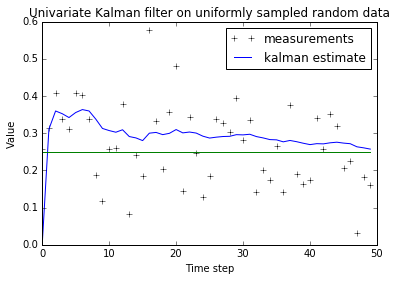

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def kalman_filter_univariate(Z, R, u, Q, p0, x0):
	# access important dimensions
	t = Z.shape[0]
	series_length = (t,)

	#allocate space for arrays
	X = np.zeros(series_length) #estimate of X
	P = np.zeros(series_length) #process covariance matrix
	K = np.zeros(series_length) #Kalman gain
	X[0] = x0
	P[0] = p0

	for k in xrange(1,t):
		X[k] = X[k-1] + u[k]
		P[k] = P[k-1] + Q
		K[k] = P[k] / (P[k] + R)
		X[k] = X[k] + K[k]*(Z[k]  - X[k])
		P[k] = (1 - K[k]) * P[k]

	return P, X

def kalman_uni_simul():
	timesteps = 50
	
	true_value = .25
	variance = .1
	Z = np.random.normal(true_value, variance, size = (timesteps,))
	R = variance**2
	Q = (1e-5) #process variance
	u = np.zeros((timesteps,)) #control variable matrix

	p0 = 1
	x0 = 0

	(P, X) = kalman_filter_univariate(Z, R, u, Q, p0, x0)
    
	plt.figure()
	plt.plot(Z, 'k+', label = 'measurements')
	plt.plot(X, 'b-', label = 'kalman estimate')
	plt.plot(true_value*np.ones((timesteps,)), 'g')
	plt.legend()
	plt.title('Univariate Kalman filter on uniformly sampled random data')
	plt.xlabel('Time step')
	plt.ylabel('Value')
	plt.show()
    
kalman_uni_simul()

We now show the same problem with uniformly random sampled data, but with a multivariate implementation of the Kalman filter

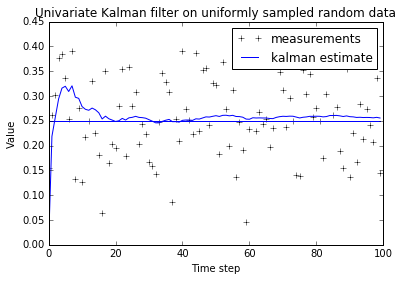

In [3]:
def kalman_filter_multivariate(Fm, Z, H, R, u, B, Q, p0, x0):
	# access important dimensions
	t = Z.shape[0]
	n = x0.shape[1]
	m = Z.shape[1]

	# c = u.shape[1]

	#allocate space for arrays
	X = np.zeros
    ((t, n))
	P = np.zeros((t, n, n))
	X[0, :] = x0
	P[0, :, :] = p0

	for k in xrange(1,t):
		X[k, :] = np.dot(Fm, X[k-1, :]) + np.dot(B, u[k, :])
		P[k, :, :] = np.dot(np.dot(Fm, P[k-1,: ,:]), np.transpose(Fm)) + Q[k, :]
		K = np.dot(np.dot(P[k, :, :], np.transpose(H)), np.linalg.inv(np.array(np.dot(np.dot(H, P[k, :, :]), np.transpose(H))) + R[k, :, :]))
		X[k, :] = X[k, :] + np.dot(K, (Z[k, :] - np.dot(H, X[k, :])))
		P[k, :, :] = np.dot((np.eye(n) - np.dot(K, H)), P[k, :, :])

	return P, X

def main():
	timesteps = 100

	true_value = .25
	variance = .1
	
	Z = np.random.normal(true_value, variance, size = (timesteps, 1))
	R = .2*np.ones((timesteps, 1, 1))
	Q = (1e-5)*np.ones((timesteps, 1))
	
	u = np.zeros((timesteps,1)) #control variable matrix
	#for simplicity
	B = 0
	H = np.array([1])
	Fm = 1

	p0 = np.array([1])
	x0 = np.zeros((1, 1))

	(P, X) = kalman_filter_multivariate(Fm, Z, H, R, u, B, Q, p0, x0)
	
	plt.figure(2)
	plt.plot(Z, 'k+', label = 'measurements')
	plt.plot(X, 'b-', label = 'kalman estimate')
	plt.plot(true_value*np.ones((timesteps,)))
	plt.legend()
	plt.title('Univariate Kalman filter on uniformly sampled random data')
	plt.xlabel('Time step')
	plt.ylabel('Value')
	plt.show()
    
main()

Now, we analyze the Kalman filter with multivariate normal data

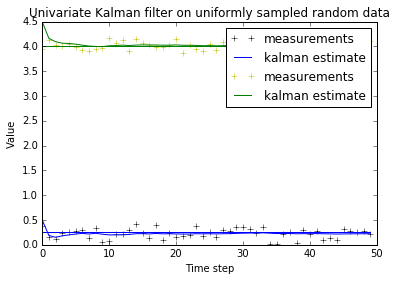

In [6]:
def kalman_filter_multivariate(Fm, Z, H, R, u, B, Q, p0, x0):
	# access important dimensions
	t = Z.shape[0]
	n = x0.shape[1]
	m = Z.shape[1]

	#TODO: manipulate array inputs to be the same shape

	# c = u.shape[1]

	#allocate space for arrays
	X = np.zeros((t, n))
	P = np.zeros((t, n, n))
	X[0, :] = x0
	P[0, :, :] = p0

	for k in xrange(1,t):
		X[k, :] = np.dot(Fm, X[k-1, :]) + np.squeeze(np.dot(B, u[k, :, :]))
		P[k, :, :] = np.dot(np.dot(Fm, P[k-1,: ,:]), np.transpose(Fm)) + Q[k, :]
		K = np.dot(np.dot(P[k, :, :], np.transpose(H)), np.linalg.inv(np.array(np.dot(np.dot(H, P[k, :, :]), np.transpose(H))) + R[k, :, :]))
		X[k, :] = X[k, :] + np.dot(K, (Z[k, :] - np.dot(H, X[k, :])))
		P[k, :, :] = np.dot((np.eye(n) - np.dot(K, H)), P[k, :, :])

	return P, X

def multivaraite_simul():
	timesteps = 50
	signal_1 = .25
	signal_2 = 4
	signal_variance = .1

	Z = np.zeros((timesteps, 2))
	Z[:, 0] = np.random.normal(signal_1, signal_variance, size = (timesteps,))
	Z[:, 1] = np.random.normal(signal_2, signal_variance, size = (timesteps,))
	R_mat_ind = signal_variance * np.eye(2)
	R = np.zeros((timesteps, 2, 2))
	for x in xrange(0,timesteps):
		R[x, :, :] = R_mat_ind
	Q = (1e-5)*np.ones((timesteps, 2))
	u = np.zeros((timesteps,1, 1)) #control variable matrix
	B = np.zeros((2, 1))
	H = np.eye(2)
	Fm = np.eye(2)

	p0 = np.eye(2)
	x0 = np.array([[.5, 4.5],])

	(P, X) = kalman_filter_multivariate(Fm, Z, H, R, u, B, Q, p0, x0)

	plt.figure()
	plt.plot(Z[:, 0], 'k+', label = 'measurements')
	plt.plot(X[:, 0], 'b-', label = 'kalman estimate')
	plt.plot(signal_1*np.ones((timesteps,)))

	plt.plot(Z[:, 1], 'y+', label = 'measurements')
	plt.plot(X[:, 1], 'g-', label = 'kalman estimate')
	plt.plot(signal_2*np.ones((timesteps,)))
	plt.legend()
	plt.title('Univariate Kalman filter on uniformly sampled random data')
	plt.xlabel('Time step')
	plt.ylabel('Value')
	plt.show()
    
multivaraite_simul()